In [227]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils import weight_norm
import torch.utils.data as Data
import torch.optim as optim
import matplotlib.pyplot as plt
import sklearn.metrics as MK
from matplotlib import rcParams
from torchsummary import summary
import pywt
device = torch.device('cpu')

In [228]:
# import os
# import numpy as np

# def readtxt(folder_path):    
#     new_data = []

#     for folder_name in os.listdir(folder_path):
#         folder_dir = os.path.join(folder_path, folder_name)
#         print(folder_name)

#         if os.path.isdir(folder_dir):
#             for filename in os.listdir(folder_dir):
#                 if filename.endswith(".txt"):
#                     file_path = os.path.join(folder_dir, filename)
#                     data = np.loadtxt(file_path)
#                     new_data.append(data[:, 1])
#     return np.concatenate([a.flatten() for a in new_data])
# aa = readtxt(folder_path = r"F:\OneDrive\桌面\数据\SO2  分类 - 副本")
# aa,aa.shape

In [229]:
# yy1 = x[250]#画一个看
# print(yy1.shape)
# xx1 = [i for i in range(421)]#一个光谱样本数据的大小
# z1 = np.polyfit(xx1, yy1, 4) # 用4次多项式拟合，可改变多项式阶数
# p1 = np.poly1d(z1) #得到多项式系数，按照阶数从高到低排列
# print(p1)  #显示多项式
# fit = p1(xx1)
# plt.plot(xx1, yy1, 'r',label='original values')
# plt.plot(xx1, fit, '*',label='polyfit values')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend(loc=1) # 指定图例legend在第一象限
# plt.title('polyfitting')
# plt.show()

DOAS

In [230]:
# def koumanbian(shuju):
#     xinshuju = []
#     for i in shuju:
#         zz1 = np.polyfit([i for i in range(len(i))], i, 4) # 拟合
#         pp1 = np.poly1d(zz1) 
#         xinshuju.append(np.log(i/(pp1([i for i in range(len(i))]))))
#     return np.array(xinshuju)

In [231]:
# jj = koumanbian(x)
# jj.shape
# plt.figure()
# plt.plot(jj[93],label='min')
# # plt.plot(jj[225],label='mid1')
# # plt.plot(jj[270],label='mid2')
# # plt.plot(jj[360],label='max')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend(loc=1) 
# plt.title('cha fen pu')
# plt.show()

In [232]:
x = np.array(pd.read_excel(r'F:\OneDrive\桌面\混合气体差分谱.xlsx'))
print(x.shape)

(3300, 500)


WPD

In [233]:
def reconstructe (shuju):
    new_data = []
    for i in shuju:
        wp = pywt.WaveletPacket(data=i, wavelet='db3', mode='symmetric', maxlevel=3)
        nodes = wp.get_level(3, 'freq')
        labels = [n.path for n in nodes]
        threshold = np.std(i) * np.sqrt(1*np.log(len(i)))
        for label in labels:
            if wp[label].data is not None and np.abs(wp[label].data).max() < threshold:
                wp[label].data.fill(0)
        denoised_sig = wp.reconstruct(update=True)
        new_data.append(denoised_sig)
    return np.array(new_data)

In [234]:
x = reconstructe(x)

In [235]:
pp = np.ones(100)
y1 = pp*0
y2 = pp*0
y3 = pp*0
y4 = pp*0
y5 = pp*0
y6 = pp*0
y7 = pp*0
y8 = pp*0
y9 = pp*0.1
y10 = pp*0.5
y11 = pp*6
y12 = pp*10
y13 = pp*8
y14 = pp*2
y15 = pp*6
y16 = pp*4
y17 = pp*0.5
y18 = pp*2
y19 = pp*0.1
y20 = pp*4
y21 = pp*0
y22 = pp*0
y23 = pp*0
y24 = pp*0
y25 = pp*8
y26 = pp*10
y27 = pp*6
y28 = pp*4
y29 = pp*2
y30 = pp*0.5
y31 = pp*8
y32 = pp*10
y33 = pp*0.1
ySO2 = np.r_[y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33]

pp = np.ones(100)
yy1 = pp*0
yy2 = pp*0
yy3 = pp*0
yy4 = pp*0
yy5 = pp*0.1
yy6 = pp*0.5
yy7 = pp*4
yy8 = pp*6
yy9 = pp*0
yy10 = pp*0
yy11 = pp*0
yy12 = pp*0
yy13 = pp*0.5
yy14 = pp*4
yy15 = pp*0.1
yy16 = pp*2
yy17 = pp*0
yy18 = pp*0
yy19 = pp*0
yy20 = pp*0
yy21 = pp*6
yy22 = pp*10
yy23 = pp*2
yy24 = pp*8
yy25 = pp*2
yy26 = pp*8
yy27 = pp*10
yy28 = pp*10
yy29 = pp*0.5
yy30 = pp*6
yy31 = pp*0.1
yy32 = pp*8
yy33 = pp*4
yCS2 = np.r_[yy1,yy2,yy3,yy4,yy5,yy6,yy7,yy8,yy9,yy10,yy11,yy12,yy13,yy14,yy15,yy16,yy17,yy18,yy19,yy20,yy21,yy22,yy23,yy24,yy25,yy26,yy27,yy28,yy29,yy30,yy31,yy32,yy33]

pp = np.ones(100)
yyy1 = pp*0.1
yyy2 = pp*0.5
yyy3 = pp*2
yyy4 = pp*8
yyy5 = pp*0
yyy6 = pp*0
yyy7 = pp*0
yyy8 = pp*0
yyy9 = pp*0
yyy10 = pp*0
yyy11 = pp*0
yyy12 = pp*0
yyy13 = pp*0
yyy14 = pp*0
yyy15 = pp*0
yyy16 = pp*0
yyy17 = pp*6
yyy18 = pp*0.1
yyy19 = pp*4
yyy20 = pp*10
yyy21 = pp*0.5
yyy22 = pp*2
yyy23 = pp*6
yyy24 = pp*4
yyy25 = pp*6
yyy26 = pp*10
yyy27 = pp*8
yyy28 = pp*0.5
yyy29 = pp*8
yyy30 = pp*0.1
yyy31 = pp*2
yyy32 = pp*4
yyy33 = pp*10
yNO = np.r_[yyy1,yyy2,yyy3,yyy4,yyy5,yyy6,yyy7,yyy8,yyy9,yyy10,yyy11,yyy12,yyy13,yyy14,yyy15,yyy16,yyy17,yyy18,yyy19,yyy20,yyy21,yyy22,yyy23,yyy24,yyy25,yyy26,yyy27,yyy28,yyy29,yyy30,yyy31,yyy32,yyy33]
y = np.c_[ySO2,yCS2,yNO]
print(y.shape)

(3300, 3)


In [236]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 17)

In [237]:
print(f'x_train:{x_train.shape}')
x_train = np.array(x_train).reshape(x_train.shape[0],1, x_train.shape[1])
x_test = np.array(x_test).reshape(x_test.shape[0],1, x_test.shape[1])
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))

x_train:(2640, 500)
Shapes:
x_train:(2640, 1, 500)
y_train:(2640, 3)

x_test:(660, 1, 500)
y_test:(660, 3)



In [238]:
torch.manual_seed(20)   
x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train)
torch_dataset = Data.TensorDataset(x_train, y_train)    
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=2640,  # Reduce the batch_size so that the weights can learn adaptively
    shuffle=False  
)

In [239]:
class ChannelAttention(nn.Module):         
    def __init__(self, in_planes, ratio):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool1d(1)
        self.max_pool = nn.AdaptiveMaxPool1d(1)
        self.fc1 = nn.Conv1d(in_planes, in_planes // ratio, 1, bias=False)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Conv1d(in_planes // ratio, in_planes, 1, bias=False) 
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):       
        avg_out = self.fc2(self.relu1(self.fc1(self.avg_pool(x))))
        max_out = self.fc2(self.relu1(self.fc1(self.max_pool(x))))
        out = avg_out + max_out
        return self.sigmoid(out)

In [240]:
class SpatialAttention(nn.Module):           
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__() 
        assert  kernel_size in (3,7), 'kernel size must be 3 or 7'
        padding = 3 if kernel_size == 7 else 1 
        self.conv1 = nn.Conv1d(2, 1, kernel_size, padding=padding, bias=False)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out,_ = torch.max(x, dim=1, keepdim=True)
        x = torch.cat([avg_out, max_out], dim=1)
        x = self.conv1(x)
        return self.sigmoid(x)

In [241]:
class CBAM(nn.Module):
    def __init__(self, in_planes=32*3, ratio=8, kernel_size=7):
        super(CBAM, self).__init__()
        self.ca = ChannelAttention(in_planes, ratio)
        self.sa = SpatialAttention(kernel_size)
        
    def forward(self, x):
        out = x*self.ca(x)
        result = out*self.sa(out)
        return result

In [242]:
def VisualBlock(epochs, TheNthSample, channels, VisualData):
    if epoch == epochs: 
        for channel in range (0, channels):
            plt.subplot(12, 8, channel+1)
            plt.figure(1, dpi = 400)
            get_data = VisualData[TheNthSample][channel]
            get_data = get_data.reshape(-1, 1)
            plt.plot(get_data.detach().numpy(),linewidth = 0.5)
            plt.xticks([0, 50, 100], fontsize = 5)
            plt.yticks(fontsize = 5)
            plt.tick_params(axis='x', which='major', width=0.1, length=0.5, pad=0)
            plt.tick_params(axis='y', which='major', width=0.1, length=0.5, pad=0)
            plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
        legend = plt.legend(['Multi-level spectral features', 'Weighted multi-level spectral features'], fontsize=5, bbox_to_anchor=(-1.9, -1.5), loc='lower center', ncol=2,frameon=False)
        plt.savefig ('F:\\OneDrive\\桌面\\zxy.png', dpi=300, facecolor='w', edgecolor='w', orientation='portrait',
        format=None, transparent=False, bbox_inches='tight', pad_inches=0.01, metadata=None)

In [243]:
class CNN_base(nn.Module):
    def __init__(self): 
        super(CNN_base,self).__init__() 
        
        self.conv1 = nn.Conv1d(1, 32, kernel_size=5, padding=5, stride=5, dilation=4)
        self.conv2 = nn.Conv1d(1, 32, kernel_size=15, padding=10, stride=5, dilation=2)  
        self.conv3 = nn.Conv1d(1, 32, kernel_size=30, padding=25, stride=5, dilation=2)
        
        self.conv4 = nn.Conv1d(32, 32, kernel_size=5, padding=2, stride=1, dilation=1)
        self.conv5 = nn.Conv1d(32, 32, kernel_size=15, padding=7, stride=1, dilation=1)  
        self.conv6 = nn.Conv1d(32, 32, kernel_size=30, padding=14, stride=1, dilation=1)
        
        self.conv7 = nn.Conv1d(32, 32, kernel_size=5, padding=2, stride=1, dilation=1)
        self.conv8 = nn.Conv1d(32, 32, kernel_size=15, padding=7, stride=1, dilation=1)  
        self.conv9 = nn.Conv1d(32, 32, kernel_size=30, padding=14, stride=1, dilation=1)
        
        self.mp = nn.MaxPool1d(2)  
        self.relu = nn.LeakyReLU()
#         self.softmax = nn.Softmax()
        self.cbam = CBAM()
        self.weights = nn.Parameter(torch.ones(3).float())
        self.fc1 = nn.Sequential(
            nn.Linear(96*99,128),
            nn.LeakyReLU() ,  
            nn.Linear(128,64),
            nn.LeakyReLU() , 
            nn.Linear(64,1)   )
        self.fc2 = nn.Sequential(
            nn.Linear(96*99,128),
            nn.LeakyReLU() ,  
            nn.Linear(128,64),
            nn.LeakyReLU() , 
            nn.Linear(64,1)   )
        self.fc3 = nn.Sequential(
            nn.Linear(96*99,128),
            nn.LeakyReLU() , 
            nn.Linear(128,64),
            nn.LeakyReLU() , 
            nn.Linear(64,1)   )
                   
    def forward(self,x): 

        out1 = self.relu(self.conv1(x))
        out2 = self.relu(self.conv2(x))
        out3 = self.relu(self.conv3(x))
        outs1 = out1 + out2 + out3
        
        out1 = self.relu(self.conv4(outs1))
        out2 = self.relu(self.conv5(outs1)) 
        out3 = self.relu(self.conv6(outs1))
        out3 = torch.cat([(torch.zeros(out3.shape[0:2]).unsqueeze(-1)),out3],-1)
        outs2 = out1 + out2 + out3
        
        out1 = self.relu(self.conv7(outs2))
        out2 = self.relu(self.conv8(outs2))
        out3 = self.relu(self.conv9(outs2))
        out3 = torch.cat([(torch.zeros(out3.shape[0:2]).unsqueeze(-1)),out3],-1)
        outs3 = out1 + out2 + out3
        
        outs = torch.cat([outs1, outs2, outs3],1)
        VisualBlock(epochs = 50, TheNthSample = 52, channels = 96, VisualData = outs)
#         if epoch == 100: 
#             for a in range (0,96):
#                 plt.subplot(12,8,a+1)
#                 plt.figure(1, dpi=400)
#                 ban = outs[50][a]
#                 ban = ban.reshape(-1,1)
#                 plt.plot(ban.detach().numpy(),linewidth = 0.5)
#                 plt.xticks([0,50,100], fontsize=5)
#                 plt.yticks( fontsize=5)
#                 plt.tick_params(axis='x', which='major', width=0.1, length=0.5, pad=0)
#                 plt.tick_params(axis='y', which='major', width=0.1, length=0.5, pad=0)
#                 plt.subplots_adjust(wspace=0.5, hspace=0.5)
        out = self.cbam(outs)
        VisualBlock(epochs = 50, TheNthSample = 52, channels = 96, VisualData = out)
#         if epoch == 100: 
#             for b in range (0,96):
#                 plt.subplot(12,8,b+1)
#                 plt.figure(1, dpi=400)
#                 ban = out[0][b]
#                 ban = ban.reshape(-1,1)
#                 plt.plot(ban.detach().numpy(),linewidth = 0.5)
#                 plt.xticks([0,50,100], fontsize=5)
#                 plt.yticks( fontsize=5)
#                 plt.tick_params(axis='x', which='major', width=0.1,length=0.5, pad=0)
#                 plt.tick_params(axis='y', which='major', width=0.1,length=0.5, pad=0)
#             legend = plt.legend(['Multi-level spectral features', 'Weighted multi-level spectral features'], fontsize=5, bbox_to_anchor=(-1.9, -1.5), loc='lower center', ncol=2,frameon=False)
#             plt.savefig ('F:\\OneDrive\\桌面\\zxy.png', dpi=300, facecolor='w', edgecolor='w', orientation='portrait', 
#             format=None, transparent=False, bbox_inches='tight', pad_inches=0.01, metadata=None)
        out = out.view(-1, 96 * 99)
        out1 = self.fc1(out)
        out2 = self.fc1(out)
        out3 = self.fc1(out)
        return out1, out2, out3
from torchsummary import summary
summary(CNN_base(),(1,500))

torch.Size([2, 1, 500])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 32, 99]             192
         LeakyReLU-2               [-1, 32, 99]               0
            Conv1d-3               [-1, 32, 99]             512
         LeakyReLU-4               [-1, 32, 99]               0
            Conv1d-5               [-1, 32, 99]             992
         LeakyReLU-6               [-1, 32, 99]               0
            Conv1d-7               [-1, 32, 99]           5,152
         LeakyReLU-8               [-1, 32, 99]               0
            Conv1d-9               [-1, 32, 99]          15,392
        LeakyReLU-10               [-1, 32, 99]               0
           Conv1d-11               [-1, 32, 98]          30,752
        LeakyReLU-12               [-1, 32, 98]               0
           Conv1d-13               [-1, 32, 99]           5,152
        LeakyRe

In [244]:
def train(model, optimizer, EPOCHS, criterion):
    Loss_all_list = []
    weight_all = []
    global epoch
    for epoch in range(1, EPOCHS + 1):
        Loss_list = []
        model.train()
        weight_sum = torch.zeros(3)
        
        for inputs,labels in loader:
            inputs = torch.Tensor(inputs).float()
            inputs.to(device) 
            optimizer.zero_grad() 
            output1,output2,output3 = model(inputs)
#             model.weights.data = model.softmax(model.weights.data)
            loss1 = criterion(output1, labels[:,0].unsqueeze(1)) 
            loss2 = criterion(output2, labels[:,1].unsqueeze(1))
            loss3 = criterion(output3, labels[:,2].unsqueeze(1))
            loss = (
                (model.weights[0] / torch.sum(model.weights)) * loss1 +
                (model.weights[1] / torch.sum(model.weights)) * loss2 +
                (model.weights[2] / torch.sum(model.weights)) * loss3 +
                (1 / (model.weights[0])) +
                (1 / (model.weights[1])) +
                (1 / (model.weights[2]))
            )
            print(model.weights[0]/torch.sum(model.weights),model.weights[1]/torch.sum(model.weights),model.weights[2]/torch.sum(model.weights))
            loss.backward() 
            optimizer.step()
            weight_sum += (model.weights / torch.sum(model.weights)).detach()
            
            print('Train Epoch: {}/{}\tLoss: {:.6f},'.format(
                epoch, EPOCHS, loss.item()))
            
            Loss_list.append(loss.item())
        weight_avg = weight_sum / len(loader)  
        weight_all.append(weight_avg.numpy())
        Loss_all_list.append(np.mean(np.array(Loss_list))) 
        pd.DataFrame(weight_all).to_excel('F:\\OneDrive\\桌面\\zxy.xlsx')
    plt.figure()
    plt.xlabel('Epoch(times)')
    plt.ylabel('Loss')
    plt.plot(np.array(Loss_all_list))

torch.Size([2640, 1, 500])
tensor(0.3333, grad_fn=<DivBackward0>) tensor(0.3333, grad_fn=<DivBackward0>) tensor(0.3333, grad_fn=<DivBackward0>)
Train Epoch: 1/100	Loss: 23.192371,
torch.Size([2640, 1, 500])
tensor(0.3333, grad_fn=<DivBackward0>) tensor(0.3333, grad_fn=<DivBackward0>) tensor(0.3333, grad_fn=<DivBackward0>)
Train Epoch: 2/100	Loss: 22.601753,
torch.Size([2640, 1, 500])
tensor(0.3333, grad_fn=<DivBackward0>) tensor(0.3333, grad_fn=<DivBackward0>) tensor(0.3333, grad_fn=<DivBackward0>)
Train Epoch: 3/100	Loss: 21.245945,
torch.Size([2640, 1, 500])
tensor(0.3333, grad_fn=<DivBackward0>) tensor(0.3333, grad_fn=<DivBackward0>) tensor(0.3333, grad_fn=<DivBackward0>)
Train Epoch: 4/100	Loss: 19.783987,
torch.Size([2640, 1, 500])
tensor(0.3333, grad_fn=<DivBackward0>) tensor(0.3333, grad_fn=<DivBackward0>) tensor(0.3333, grad_fn=<DivBackward0>)
Train Epoch: 5/100	Loss: 17.985893,
torch.Size([2640, 1, 500])
tensor(0.3333, grad_fn=<DivBackward0>) tensor(0.3333, grad_fn=<DivBackwar

Train Epoch: 46/100	Loss: 12.924870,
torch.Size([2640, 1, 500])
tensor(0.3307, grad_fn=<DivBackward0>) tensor(0.3381, grad_fn=<DivBackward0>) tensor(0.3313, grad_fn=<DivBackward0>)
Train Epoch: 47/100	Loss: 12.692975,
torch.Size([2640, 1, 500])
tensor(0.3305, grad_fn=<DivBackward0>) tensor(0.3383, grad_fn=<DivBackward0>) tensor(0.3312, grad_fn=<DivBackward0>)
Train Epoch: 48/100	Loss: 12.691146,
torch.Size([2640, 1, 500])
tensor(0.3304, grad_fn=<DivBackward0>) tensor(0.3386, grad_fn=<DivBackward0>) tensor(0.3310, grad_fn=<DivBackward0>)
Train Epoch: 49/100	Loss: 12.690141,
torch.Size([2640, 1, 500])
tensor(0.3302, grad_fn=<DivBackward0>) tensor(0.3388, grad_fn=<DivBackward0>) tensor(0.3309, grad_fn=<DivBackward0>)
Train Epoch: 50/100	Loss: 12.652349,
torch.Size([2640, 1, 500])
tensor(0.3301, grad_fn=<DivBackward0>) tensor(0.3391, grad_fn=<DivBackward0>) tensor(0.3308, grad_fn=<DivBackward0>)
Train Epoch: 51/100	Loss: 12.651031,
torch.Size([2640, 1, 500])
tensor(0.3300, grad_fn=<DivBack

tensor(0.3251, grad_fn=<DivBackward0>) tensor(0.3484, grad_fn=<DivBackward0>) tensor(0.3265, grad_fn=<DivBackward0>)
Train Epoch: 92/100	Loss: 12.363527,
torch.Size([2640, 1, 500])
tensor(0.3250, grad_fn=<DivBackward0>) tensor(0.3487, grad_fn=<DivBackward0>) tensor(0.3264, grad_fn=<DivBackward0>)
Train Epoch: 93/100	Loss: 12.560401,
torch.Size([2640, 1, 500])
tensor(0.3249, grad_fn=<DivBackward0>) tensor(0.3489, grad_fn=<DivBackward0>) tensor(0.3263, grad_fn=<DivBackward0>)
Train Epoch: 94/100	Loss: 12.343999,
torch.Size([2640, 1, 500])
tensor(0.3248, grad_fn=<DivBackward0>) tensor(0.3491, grad_fn=<DivBackward0>) tensor(0.3262, grad_fn=<DivBackward0>)
Train Epoch: 95/100	Loss: 12.533974,
torch.Size([2640, 1, 500])
tensor(0.3247, grad_fn=<DivBackward0>) tensor(0.3493, grad_fn=<DivBackward0>) tensor(0.3261, grad_fn=<DivBackward0>)
Train Epoch: 96/100	Loss: 12.376138,
torch.Size([2640, 1, 500])
tensor(0.3246, grad_fn=<DivBackward0>) tensor(0.3495, grad_fn=<DivBackward0>) tensor(0.3260, gr

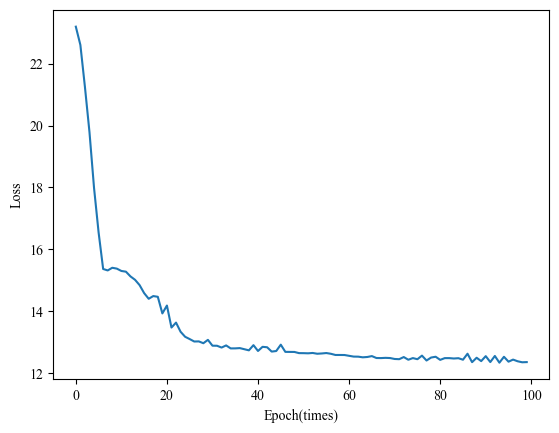

In [246]:
model = CNN_base()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)
EPOCHS = 100
train(model, optimizer, EPOCHS, criterion)

In [ ]:
def test(model, x_test, y_test):
    preds1 = []
    preds2 = []
    preds3 = [] 
    y_true1 = []
    y_true2 = []
    y_true3 = []
    
    model.eval()
    with torch.no_grad():       
        x_test = torch.Tensor(x_test).float()
        y_test = torch.Tensor(y_test).float()
        y_test = y_test.squeeze()
        outputs1,outputs2,outputs3 = model(x_test) 
        detached_pred1 = outputs1.detach().cpu().numpy()
        detached_pred2 = outputs2.detach().cpu().numpy()
        detached_pred3 = outputs3.detach().cpu().numpy()       
        detached_label = y_test.detach().cpu().numpy()
        for f in range(0, len(detached_label)):
            preds1.append(detached_pred1[f])
            preds2.append(detached_pred2[f])
            preds3.append(detached_pred3[f])
            y_true1.append(detached_label[f][0])
            y_true2.append(detached_label[f][1])
            y_true3.append(detached_label[f][2])
        mse = MK.mean_squared_error(y_true1, preds1)
        r2 = MK.r2_score(y_true1, preds1)
        print('SO2 MSE:',mse)
        print('SO2 R2:',r2) 
        MSE = MK.mean_squared_error(y_true2, preds2)
        R2 = MK.r2_score(y_true2, preds2)
        print('CS2 MSE:',MSE)
        print('CS2 R2:',R2)  
        MMSE = MK.mean_squared_error(y_true3, preds3)
        RR2 = MK.r2_score(y_true3, preds3)
        print('NO MSE:',MMSE)
        print('NO R2:',RR2) 
        sor = np.argsort(y_test[:,0],axis=0)
        sor1 = np.argsort(y_test[:,1],axis=0)
        sor2 = np.argsort(y_test[:,2],axis=0)
        x_ = range(len(sor))
        plt.figure(1)
        plt.figure(figsize=(10,6))
        plt.scatter(x_, outputs1[sor])
        plt.scatter(x_,y_test[:,0][sor])
        legend = plt.legend(['pre', 'act'],fontsize=20)
        plt.xlabel('Number of data groups',fontsize=20)
        plt.ylabel('$\mathregular{SO_2}$ concentration (ppm)',fontsize=20)
        plt.figure(2)
        plt.figure(figsize=(10,6))
        plt.scatter(x_, outputs2[sor1])
        plt.scatter(x_,y_test[:,1][sor1])
        legend = plt.legend(['pre', 'act'],fontsize=20)
        plt.xlabel('Number of data groups',fontsize=20)
        plt.ylabel('$\mathregular{CS_2}$ concentration (ppm)',fontsize=20)
        plt.figure(3)
        plt.figure(figsize=(10,6))
        plt.scatter(x_, outputs3[sor2])
        plt.scatter(x_,y_test[:,2][sor2])
        legend = plt.legend(['pre', 'act'],fontsize=20)
        plt.xlabel('Number of data groups',fontsize=20)
        plt.ylabel('NO concentration (ppm)',fontsize=20)
        config = {
        "font.family": 'Times New Roman', 
        }
        rcParams.update(config)
        plt.show()
        result=np.c_[y_test[:,0][sor],y_test[:,1][sor1],y_test[:,2][sor2], outputs1[sor],outputs2[sor1],outputs3[sor2]]

In [ ]:
test(model, x_test, y_test)

In [ ]:
def test(model, x_test, y_test):
    preds1 = []
    preds2 = []
    preds3 = [] 
    y_true1 = []
    y_true2 = []
    y_true3 = []

    model.eval()
    with torch.no_grad():
        x_test = torch.Tensor(x_test).float()
        y_test = torch.Tensor(y_test).float()
        y_test = y_test.squeeze()
        outputs1,outputs2,outputs3 = model(x_test) 
        detached_pred1 = outputs1.detach().cpu().numpy()
        detached_pred2 = outputs2.detach().cpu().numpy()
        detached_pred3 = outputs3.detach().cpu().numpy()
        detached_label = y_test.detach().cpu().numpy()
        for f in range(0, len(detached_label)):
            preds1.append(detached_pred1[f])
            preds2.append(detached_pred2[f])
            preds3.append(detached_pred3[f])
            y_true1.append(detached_label[f][0])
            y_true2.append(detached_label[f][1])
            y_true3.append(detached_label[f][2]) 
        mse = MK.mean_squared_error(y_true1, preds1)
        r2 = MK.r2_score(y_true1, preds1)
        print('SO2 MSE:',mse)
        print('SO2 R2:',r2) 
        MSE = MK.mean_squared_error(y_true2, preds2)
        R2 = MK.r2_score(y_true2, preds2)
        print('CS2 MSE:',MSE)
        print('CS2 R2:',R2)  
        MMSE = MK.mean_squared_error(y_true3, preds3)
        RR2 = MK.r2_score(y_true3, preds3)
        print('NO MSE:',MMSE)
        print('NO R2:',RR2)           
        x_ = range(len(y_test))
        plt.figure(figsize=(22,6))
        plt.figure(1)
        plt.plot(x_, outputs1)
        plt.plot(x_,y_test[:,0])
        legend = plt.legend(['pre', 'act'],fontsize=20)
        plt.figure(2)
        plt.plot(x_, outputs2)
        plt.plot(x_,y_test[:,1])
        legend = plt.legend(['pre', 'act'],fontsize=20)
        plt.figure(3)
        plt.plot(x_, outputs3)
        plt.plot(x_,y_test[:,2])
        legend = plt.legend(['pre', 'act'],fontsize=20)
        plt.show()

In [ ]:
test(model, x_test, y_test)